# 지도학습(딥러닝)

## 1.basic

#### Tensorflow

In [107]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### Sequential
- keras.sequential클래스  : layer를 선형으로 연경하는 신경망을 구성
- 구성 방법
    - sequential 객체 생성
    - add()로 layer 추가
    - 첫번째 층
        - units : 출력 유닛 개수
        - input_shape : 입력의 개수
        - activation : 활성화 함수
        - linear : 기본값으로 입력값과 가중치로 계산된 결과값이 그대로 출력됨
        - sigmoid : 시그모이드 함수 - 이진분류에 사용
        - softmax : 소프트맥스 함수 - 다중클래스 분류에 사용
        - relu : 렐루 함수 - 은닉층에 주로 사용
    - summary()로 신경망 구성 확인

In [108]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

model = Sequential()
model.add(Dense(units=1, input_shape=(1,), kernel_initializer = initializer))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compile
- 모델의 학습에 대한 환경을 설정함
- 매개변수
    - optimizer : sgd, adam 등
    - loss : 손실함수 설정(mse, categorical_crossentropy 등)
    - metric : 성능을 평가(mae, acc 등)

In [109]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### fit
- 모델 학습
- 인자
    - x : 입력데이터
    - y : label
    - batch_size : 한 번에 학습할 때 사용하는 데이터 개수. 
    - epochs : 학습 데이터 반복 횟수로 학습 데이터세트 전체를 몇 번 학습할지 설정
      여러번 학습할수록 학습 효과는 커지지만 과대적합 현상이 발생할 수 있다

In [90]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [2*n+1 for n in x]

x_train = np.array(x).reshape(-1,1)
y_train = np.array(y)

model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 552ms/step - loss: 323.2250 - mae: 16.1452
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 14.9011 - mae: 3.5555
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.7542 - mae: 0.8584
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1045 - mae: 0.2802
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0741 - mae: 0.2255
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0721 - mae: 0.2238
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0715 - mae: 0.2230
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0709 - mae: 0.2223
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0703 - mae: 0.2214
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0697 - mae: 0.2205
Epoch 11/1000
1/1 [==============================] - 0s 10m

1/1 [==============================] - 0s 8ms/step - loss: 0.0267 - mae: 0.1365
Epoch 125/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - mae: 0.1359
Epoch 126/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0262 - mae: 0.1353
Epoch 127/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0260 - mae: 0.1348
Epoch 128/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0258 - mae: 0.1342
Epoch 129/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0256 - mae: 0.1336
Epoch 130/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0254 - mae: 0.1331
Epoch 131/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0252 - mae: 0.1325
Epoch 132/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0250 - mae: 0.1320
Epoch 133/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0247 - mae: 0.1314
Epoch 134/1000
1/1 [==============================] - 0s 10m

##### 모델 가중치 확인

In [91]:
print(model.weights)

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.001265]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.99119264], dtype=float32)>]


In [92]:
print(f'weight : {model.layers[0].weights[0].numpy()}')
print(f'bias : {model.layers[0].bias.numpy()}')

weight : [[2.001265]]
bias : [0.99119264]


#### predict

In [93]:
print(model.predict([[11], [12], [13]]))

1/1 [==============================] - 0s 85ms/step
[[23.005108]
 [25.006372]
 [27.007637]]


## 2.항공사 고객 만족 분류 모델 구현(DNN)

### 2-1. 데이터 불러오기
데이터 : https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

In [94]:
df = pd.read_csv('./지도학습_데이터/Invistico_Airline.csv', encoding='cp949')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


### 2-2. 데이터 파악

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

##### 결측치 컬럼, 개수 확인

In [96]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

##### 컬럼별 값, 타입 확인

In [97]:
uniques = {}
for name in df.columns:
    uniques[name] = list(df[name].unique())
uniques['Class']

['Eco', 'Business', 'Eco Plus']

In [98]:
uniques['satisfaction'] # 고객의 만족 여부(범주형) : ['satisfied', 'dissatisfied']
uniques['Gender'] # 성별(범주형) : ['Female', 'Male']
uniques['Customer Type'] # 고객 유형(범주형) : ['Loyal Customer', 'disloyal Customer']
uniques['Age'] # 나이(연속형)
uniques['Type of Travel'] # 여행 유형(개인여행, 출장)(범주형) : ['Personal Travel', 'Business travel']
uniques['Class'] # 좌석 유형(3가지)(범주형) : ['Eco', 'Business', 'Eco Plus']
uniques['Flight Distance'] # 여행거리(연속형)
uniques['Seat comfort'] # 좌석 편안함(척도 점수) : 0~5
uniques['Departure/Arrival time convenient'] # 출발, 도착 시간의 편리함(척도 점수) : 0~5
uniques['Food and drink'] # 음식, 음료 만족도(척도 점수) : 0~5
uniques['Gate location'] # 게이트 위치에 대한 만족도(척도 점수) : 0~5
uniques['Inflight wifi service'] # 비행기 안 와이파이 만족도(척도 점수) : 0~5
uniques['Inflight entertainment'] # 비행기 안 오락거리 만족도(척도 점수) : 0~5
uniques['Online support'] # 온라인 지원 만족도(척도 점수) : 0~5
uniques['Ease of Online booking'] # 온라인 예약 용이함 만족도(척도 점수) : 0~5
uniques['On-board service'] # 온보드 서비스 만족도(척도 점수) : 0~5
uniques['Leg room service'] # 레그룸 서비스 만족도(척도 점수) : 0~5
uniques['Baggage handling'] # 수하물 처리 만족도(척도 점수) : 0~5
uniques['Checkin service'] # 체크인 서비스 만족도(척도 점수) : 0~5
uniques['Cleanliness'] # 청결 만족도(척도 점수) : 0~5
uniques['Online boarding'] # 온라인 탑승권 만족도(척도 점수) : 0~5
uniques['Departure Delay in Minutes'] # 출발 지연 시간(연속형)
uniques['Arrival Delay in Minutes'] # 출발 지연 시간(연속형)

[0.0,
 305.0,
 15.0,
 26.0,
 48.0,
 23.0,
 19.0,
 2.0,
 440.0,
 5.0,
 1.0,
 7.0,
 8.0,
 45.0,
 69.0,
 13.0,
 3.0,
 12.0,
 10.0,
 6.0,
 80.0,
 nan,
 4.0,
 86.0,
 57.0,
 14.0,
 9.0,
 96.0,
 214.0,
 50.0,
 24.0,
 137.0,
 18.0,
 27.0,
 16.0,
 121.0,
 75.0,
 17.0,
 37.0,
 53.0,
 59.0,
 76.0,
 44.0,
 131.0,
 36.0,
 33.0,
 222.0,
 32.0,
 29.0,
 28.0,
 61.0,
 35.0,
 41.0,
 63.0,
 175.0,
 38.0,
 142.0,
 90.0,
 163.0,
 84.0,
 72.0,
 74.0,
 11.0,
 118.0,
 56.0,
 119.0,
 52.0,
 25.0,
 236.0,
 112.0,
 65.0,
 93.0,
 302.0,
 34.0,
 20.0,
 124.0,
 195.0,
 136.0,
 97.0,
 179.0,
 106.0,
 78.0,
 104.0,
 21.0,
 210.0,
 22.0,
 127.0,
 87.0,
 54.0,
 245.0,
 42.0,
 49.0,
 208.0,
 60.0,
 40.0,
 66.0,
 47.0,
 297.0,
 55.0,
 102.0,
 105.0,
 250.0,
 51.0,
 166.0,
 43.0,
 46.0,
 138.0,
 160.0,
 107.0,
 31.0,
 73.0,
 77.0,
 239.0,
 174.0,
 30.0,
 133.0,
 67.0,
 70.0,
 39.0,
 168.0,
 180.0,
 122.0,
 83.0,
 265.0,
 71.0,
 99.0,
 98.0,
 64.0,
 178.0,
 146.0,
 242.0,
 58.0,
 81.0,
 91.0,
 148.0,
 156.0,
 89.0,
 62.0,


##### 요약정보 확인

In [99]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### 2-3. 데이터 전처리

#### 결측치 처리 -> 평균값으로 치환


In [100]:
from sklearn.impute import SimpleImputer

In [101]:
mean_imputer = SimpleImputer(strategy='mean')
df['Arrival Delay in Minutes'] = mean_imputer.fit_transform(df[['Arrival Delay in Minutes']])
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#### 데이터 인코딩

##### 타입 변경

In [102]:
# df.info()
type_object = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# string으로 바꾸기
df[type_object] = df[type_object].astype(str)

##### 범주형 데이터 수치형으로 변경 (A, B --> 1, 0)

In [103]:
df['satisfaction'].replace(list(df['satisfaction'].unique()), [0,1], inplace=True)
df['satisfaction'][:3]

0    0
1    0
2    0
Name: satisfaction, dtype: int64

##### 순서형 인코딩 (A,B,C --> 0,1,2)

In [104]:
categories = pd.Categorical(df['Class'],
                            categories=list(df['Class'].unique()),
                            ordered=True)

labels, unique = pd.factorize(categories, sort=True)
df['Class'] = labels

In [105]:
df['Class'][:5]
df['Class'].unique()

array([0, 1, 2], dtype=int64)

##### 원핫 인코딩 (A,B,C --> (1,0,0), (0,1,0), (0,0,1))

In [106]:
oh = ['Gender', 'Customer Type', 'Type of Travel']
df = pd.get_dummies(df, columns=oh)
df.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,0,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,1,0,0,1
1,0,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,1,0,0,1
2,0,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,1,0,0,1
3,0,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,1,0,0,1
4,0,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,1,0,0,1


In [110]:
df.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Female                          uint8
Gender_Male                            uint8
Customer T

### 2-4. 데이터 세트 분리

In [111]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction'].reset_index(drop=True)

In [116]:
y.head(5)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  random_state=2023,
                                                  test_size=0.2,
                                                  stratify=y)

print('X_train 크키 : ', X_train.shape)
print('y_train 크키 : ', y_train.shape)
print('X_val 크키 : ', X_val.shape)
print('y_val 크키 : ', y_val.shape)

X_train 크키 :  (103904, 25)
y_train 크키 :  (103904,)
X_val 크키 :  (25976, 25)
y_val 크키 :  (25976,)


### 2-5. 데이터 스케일링
- 특성별로 스테일이 다르면 학습할 때 편향된 학습을 일으킬 수 있다.
- 모든 특성의 범위(분포)를 유사하게 만들어 줘야 한다.

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

print(X_val)

[[0.20512821 0.5        0.37878568 ... 0.         1.         0.        ]
 [0.48717949 0.5        0.56629474 ... 0.         1.         0.        ]
 [0.58974359 0.         0.1973627  ... 0.         0.         1.        ]
 ...
 [0.38461538 0.         0.16099116 ... 0.         0.         1.        ]
 [0.71794872 1.         0.25981742 ... 0.         1.         0.        ]
 [0.57692308 0.5        0.03970439 ... 0.         1.         0.        ]]


### 2-6. 심층신경망 모델 생성

In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [122]:
# 모델 시드 고정
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# 모델 구성
initializer = tf.keras.initializers.GlorotUniform(seed=42)

model = Sequential()
model.add( Dense(32, 
                 activation = 'relu',
                 input_shape = (25,),
                 kernel_initializer = initializer) )
model.add( Dense(64, activation = 'relu' ))
model.add( Dense(128, activation = 'relu' ))
model.add( Dense(64, activation = 'relu' ))
model.add( Dropout(0.3) )
model.add( Dense(32, activation = 'relu' ))
model.add( Dropout(0.2) )
model.add( Dense(1, activation = 'sigmoid' )) # 'sigmoid' : 이진분류 

In [123]:
model.summary()

# --> 8개의 층으로 이루어짐
# --> 21633개의 파라미터를 가짐
# --> 파라미터 개수 
#     : (input 노드 개수) * (out 노드 개수) + (out노드 bias 개수) = weight개수 + bias개수

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                832       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)               

### 2-7.Compile

In [129]:
model.compile( optimizer='adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

### 2-8. 모델 학습(fit)
- 모델 학습시 epoch가 너무 크면 과대적합이 발생한다
- 이를 방지하기 위해서 Early Stopping을 사용할 수 있다
    - 검증 데이터세트에서 성능이 더 이상 증가하지 않으면 학습을 중단한다
    - EarlyStopping 객체를 생성하여 model.fit함수의 callback 매개변수에 넣어주면 된다
---
- EarlyStopping 주요 인자
    - monitor : 학습 조기 종료를 위한 성능 모니터링 도구(val_loss, val_accuracy가 주로 사용됨) (default = val_loss)
    - min_delta : 개선되고 있다고 판단하기 위한 최소 변화량
    - patience : 성능 향상을 몇 번의 에포크 동안 기다릴지 설정(default = 0)
    - verbose : 얼마나 자세하게 정보를 표출할 것인가(0, 1, 2)
    - mode : 성능 모니터링 도구의 개선 판단 기준(default = auto)
            (monitor이 val_loss -> min, val_accuracy가 -> max) 
    - restore_best_weights : 가장 좋은 값을 가지는 에포크의 모델 가중치 복원 여부(default=False : 가장 마지막 가중치만 보존함)

In [130]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta = 0,
                           patience = 10,
                           verbose = 1,
                           restore_best_weights = True)

# fit()은 history 객체를 반환한다.
# 훈련과정의 epoch에 따른 accuracy 등의 성능지표와 손실값 등을 기록한다 + 검증지표와 손실값도 기록
history = model.fit(X_train, y_train, epochs=100, batch_size=128,
                    verbose=1, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/100


812/812 [==============================] - 6s 5ms/step - loss: 0.2754 - accuracy: 0.8848 - val_loss: 0.1992 - val_accuracy: 0.9165
Epoch 2/100
812/812 [==============================] - 4s 5ms/step - loss: 0.1833 - accuracy: 0.9247 - val_loss: 0.1700 - val_accuracy: 0.9280
Epoch 3/100
812/812 [==============================] - 4s 5ms/step - loss: 0.1551 - accuracy: 0.9343 - val_loss: 0.1438 - val_accuracy: 0.9385
Epoch 4/100
812/812 [==============================] - 4s 4ms/step - loss: 0.1440 - accuracy: 0.9389 - val_loss: 0.1434 - val_accuracy: 0.9370
Epoch 5/100
812/812 [==============================] - 3s 4ms/step - loss: 0.1354 - accuracy: 0.9421 - val_loss: 0.1316 - val_accuracy: 0.9444
Epoch 6/100
812/812 [==============================] - 3s 4ms/step - loss: 0.1308 - accuracy: 0.9442 - val_loss: 0.1276 - val_accuracy: 0.9436
Epoch 7/100
812/812 [==============================] - 4s 4ms/step - loss: 0.1247 - accuracy: 0.9466 - val_loss: 0.1364 - val_accuracy: 0.9392
Epoch 8/100

### 2-9. 훈련과정 시각화

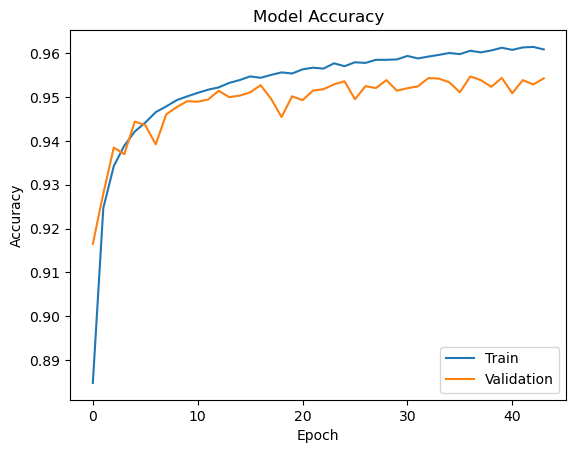

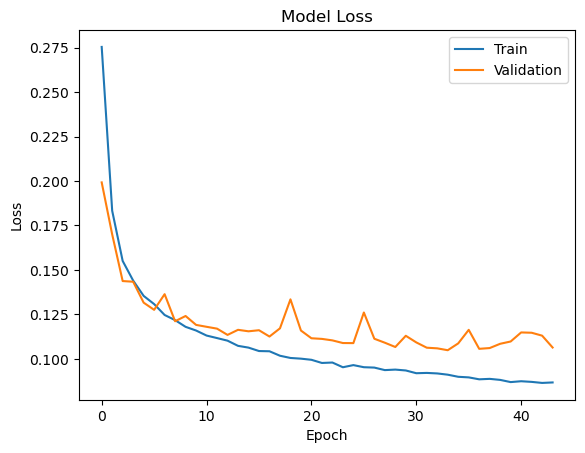

In [131]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()